<a href="https://colab.research.google.com/github/tzsoulcap/Agricultural-Product-Images-for-Super-AI-Engineer-SS3/blob/master/Agricultural_Product_Images_for_Super_AI_Engineer_SS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## install library

In [1]:
!pip install ultralytics==8.0.134 roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 629.1/629.1 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.2 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=32f3f0dc9e9b9158d53815b7f87489d19a3fcebac900bff0bba0095fa944b1d2
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      

## setup kaggle

In [1]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/hackathon/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle competitions download -c wheat-head-for-superai-3

100% 3.46G/3.47G [00:42<00:00, 57.4MB/s]
100% 3.47G/3.47G [00:42<00:00, 87.2MB/s]


In [4]:
!mkdir datasets
!unzip /content/wheat-head-for-superai-3.zip -d /content/datasets

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
  inflating: /content/datasets/Wheat-Head/train/7670a46305a8fa6768a868f130b2ebcd5ca5c4f0f672393a38b602d71d741b51.png  
  inflating: /content/datasets/Wheat-Head/train/7670a46305a8fa6768a868f130b2ebcd5ca5c4f0f672393a38b602d71d741b51.xml  
  inflating: /content/datasets/Wheat-Head/train/76895b76e9eb429969e8124a846419536191c7e8c3c271b3171407f6016fa755.png  
  inflating: /content/datasets/Wheat-Head/train/76895b76e9eb429969e8124a846419536191c7e8c3c271b3171407f6016fa755.xml  
  inflating: /content/datasets/Wheat-Head/train/76a310f2082bd808be0fb6d651a034673fb02176b43d5bb94a3be7ec97e92fdb.png  
  inflating: /content/datasets/Wheat-Head/train/76a310f2082bd808be0fb6d651a034673fb02176b43d5bb94a3be7ec97e92fdb.xml  
  inflating: /content/datasets/Wheat-Head/train/76c2d5f53134f097da926a359e259b9bf4e24949addb6962adaed7f9fd39d254.png  
  inflating: /content/datasets/Wheat-Head/train/76c2d5f53134f097da926a359e259b9bf4e24949addb6962adaed7f9fd39d2

## extract bounding box from XML files.

In [5]:
import pandas as pd
import numpy as np
import xml.etree.cElementTree as et
import os

In [6]:
import cv2
import matplotlib.pyplot as plt

In [9]:
xml_files = list(filter(lambda x: x.endswith('.xml'), os.listdir('/content/datasets/Wheat-Head/train')))[:10]
xml_files

['9207bef414c15c518ce0da853993c129ea333e5cb78f0bda102bb2c66347a9e8.xml',
 '7cb6088f6d13556e52e771aa7134ea96642afb6da8481f15409b484379ccece1.xml',
 'a59bd6ee6a1e69bcadf66fedbf0041964bf5077b6b588a19a9c9870761817ec1.xml',
 '8668d74c6c83c1e4f1100ed9bbef6824677baecb33aac212b5be4cef0fa1b754.xml',
 '4c30096ce82291b18f06225d2e7d490722bb325b46553b476a5dfe0d709a9234.xml',
 'fb2a413b7755f4b0cccc5d49f0a44200f8d57879611c7a59e519f306121efd4d.xml',
 'f15a87096d5370d471b75559e68803f53c07974eeb148ed35b7417cc3988e34f.xml',
 '4803fe6c512470dd10629008e7cf85ac72e9e9f52babf84390503e8fd44409c2.xml',
 '9cd6466e2372d34db8b1bf449e27ff948089bc6fd047477b9088c12fdcf7c310.xml',
 '357f17a57f29abefd0bec9fdbbcb4fe309b3c32efcaeebc82b6f00ecc24a2811.xml']

In [12]:
def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return f"0 {((x2 + x1)/(2*image_w))} {((y2 + y1)/(2*image_h))} {(x2 - x1)/image_w} {(y2 - y1)/image_h}"

In [36]:
for xml in xml_files:
    tree = et.parse("/content/datasets/Wheat-Head/train/" + xml)
    root = tree.getroot()
    all_obj = root.findall('object')
    boxes = []
    for obj in all_obj:
        for bbox in obj.iter('bndbox'):
            boxes.append(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
    f = open(f'/content/test_bbox/{xml[:-4]}.txt', 'w')
    f.write('\n'.join(boxes))
    f.close()

In [30]:
for i in range(10):
    for j in range(10):
        f = open(f'/content/{i}.txt', 'a')
            # print(box)
        f.write(str(j) + '\n')
        f.close()

In [ ]:
all_obj = root.findall('object')
for obj in all_obj:
    for bbox in obj.iter('bndbox'):
        print(pascal_voc_to_yolo(int(bbox[0].text), int(bbox[1].text), int(bbox[2].text), int(bbox[3].text), 512, 512))
        cv2.rectangle(image,(int(bbox[0].text),int(bbox[1].text)),
            (int(bbox[2].text),int(bbox[3].text)), (0, 0, 255), 1)

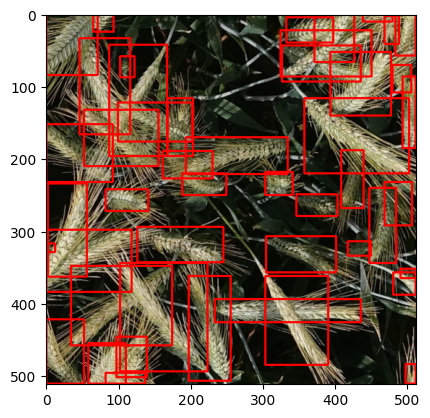

In [62]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

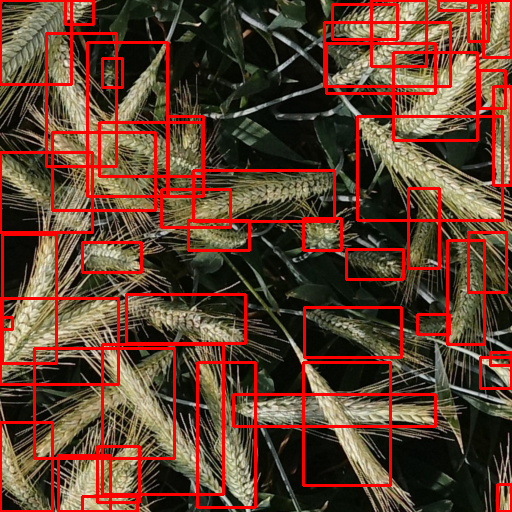

In [61]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [37]:
def get_size_img(files):
    size = files.findall('size')[0]
    width = size[0].text
    height = size[1].text
    return [width, height]

In [38]:
w, h = get_size_img(root)
print(w, h)

512 512
